<a href="https://colab.research.google.com/github/joaovictorfonseca/data_science/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Projeto de Data Science**
*by [João Victor Fonseca](https://github.com/joaovictorfonseca/data_science)*

  

# Analisando a Violência no Rio de Janeiro

É comum ao se abrir um jornal ou ao acessar um site de notícias nos depararmos com inúmeras matérias sobre casos de violência, principalmente em lugares como a cidade do Rio que, em alguns anos, possui taxas de homicídio maiores que de países europeus inteiros.
Neste notebook iremos discorrer sobre a violência no decorrer dos anos e através dos dados achar padrões e resumos estatísticos para criar hipóteses plausíveis para o cenário carioca de crimes. 

## Obtenção dos Dados

Os dados foram obtidos no portal de dados abertos do [Instituto de Segurança Pública](http://www.ispdados.rj.gov.br/estatistica.html) e engloba as ocorrências registradas entre Janeiro de 1991 e Agosto de 2019, então teremos 29 anos de dados sobre a criminalidade para nossa análise. 
É possível que os dados mais antigos possuam ausência de valores pela tardia computadorização do setor no Brasil porém podemos levar em consideração para conferir nossas análises.

Como as notícias não tem sido boas para o estado da Cidade Maravilhosa nos últimos anos esperamos que nossos gráficos mostrem tendências de aumento ao passar dos anos.

Para comparações posteriores utilizaremos a taxa de homicídios (a cada 100mil habitantes) para o Rio de Janeiro e para o Brasil entre os anos de 1991 e 2017, fornecidos pelo [IPEA](https://www.ipea.gov.br/atlasviolencia/dados-series/20) para uma análise gráfica simples acerca do comportamento ao longo dos anos entre o Rio e o país inteiro. Os dados utilizados estão disponíveis no [meu repositório](https://github.com/joaovictorfonseca/data_science).

### Importando os dados

Vamos importar as bibliotecas que serão fundamentais para nossa análise e utilizar o Pandas para tanto importar como trabalhar com o nosso banco de dados.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [31]:
df= pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')
uf_homicidios = pd.read_csv('https://raw.githubusercontent.com/joaovictorfonseca/data_science/master/taxa_homicidios_estados.csv',sep=';')
br_homicidios = pd.read_csv('https://raw.githubusercontent.com/joaovictorfonseca/data_science/master/taxa_homicidios_br.csv',sep=';')

## Análise Inicial dos Dados

Para começar vamos analisar aspectos básicos do nosso data set como formato, colunas, número de linhas , primeiras entradas e se existem valores faltantes e sua porcentagem em relação ao número de dados da coluna.

Descreva e execute as seguintes etapas:

* Qual o tamanho do seu DataFrame (`shape`)
* Extrair e imprimir os nomes das colunas (`columns`)
* Quais os tipos das variáveis (`dtypes`)
* Visualizar as 5 primeiras linhas (`head`)
* Identifique a porcentagem de valores ausentes das colunas


In [32]:
print("Linhas:{}".format(df.shape[0]))
print("Colunas:{}".format(df.shape[1]))

Linhas:344
Colunas:56


Verificando o formato do nosso dataset temos que possui 344 linhas, equivalente aos meses entre 01/1991 e 08/2019 e 56 colunas que definem os tipos de violência declarados em boletins de ocorrência da Polícia Militar do Estado do Rio de Janeiro.

As colunas do nosso banco de dados estão expostas na célula abaixo, como existem algumas colunas muito específicas, como 'sequestro_relampago' e 'extorsao' , tentaremos focar nossa análise em aspectos mais gerais e que seguem de forma mais coerente nossos indicadores de violência.


O número de casos relatados de violência pode se reduzir a metade de um ano para o outro porém o número de sequestros relâmpago pode triplicar entre esses anos pois sua taxa de ocorrência é quase irrisória em relação ao total.


In [33]:
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Abaixo temos que nossas colunas são formadas apenas de valores numéricos , floats ou inteiros, porém poderiamos transformar todas colunas em inteiros sem perda alguma de informação uma vez que não existe nada como 0.1 assassinato ou 2.3 roubos porém isso não mudaria em nada os dados extraidos, então deixaremos no formato já dado. Os dados serem todos valores numéricos será extremamente útil no momento de retirarmos informações estatísticas acerca do que escolheremos focar no projeto.

In [34]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

A seguir , vamos obervar as primeiras cinco e últimas cinco linhas de nossos dados. 

In [35]:
df.head()


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [36]:
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Como esperado, existem informações faltantes nas primeiras entradas, para não acabarmos baseando nossa análise em colunas com muitos dados faltantes, no código abaixo checaremos a porcentagem de valores não definidos para cada coluna.

In [37]:
df.isna().sum().sort_values() / df.shape[0]

vano                          0.000000
indicador_roubo_veic          0.000000
indicador_roubo_rua           0.000000
indicador_letalidade          0.000000
encontro_cadaver              0.000000
recuperacao_veiculos          0.000000
apreensao_drogas              0.000000
total_furtos                  0.000000
outros_furtos                 0.000000
furto_transeunte              0.000000
furto_veiculos                0.000000
total_roubos                  0.000000
outros_roubos                 0.000000
roubo_banco                   0.000000
roubo_em_coletivo             0.000000
fase                          0.000000
roubo_carga                   0.000000
roubo_veiculo                 0.000000
mes                           0.000000
roubo_transeunte              0.000000
hom_doloso                    0.000000
lesao_corp_dolosa             0.000000
latrocinio                    0.000000
roubo_residencia              0.000000
roubo_comercio                0.000000
tentat_hom               

## Informações Estatísticas da Violência no Rio de Janeiro

Agora iremos analisar numericamente algumas colunas de nossos dados, as escolhidas serão, em geral, as com maior número de ocorrências, ou seja, mais comuns, são elas:
  * `roubo_veiculo`
  * `furto_veiculos`
  * `recuperacao_veiculos`
  * `total_furtos`
  * `total_roubos`
  * `hom_doloso`
* E iremos checar como os veículos roubados se relacionam com os recuperados,que é dado por:
  * $\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$



In [38]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

In [39]:
df.roubo_veiculo.mean()

2448.6976744186045

In [40]:
df.furto_veiculos.mean()

1674.671511627907

In [41]:
df.recuperacao_veiculos.mean()

1772.2383720930231

In [42]:
df['Recuperacao_pct']= df['recuperacao_veiculos']/(df['roubo_veiculo'] + df['furto_veiculos'])
df['Recuperacao_pct'].describe()

count    344.000000
mean       0.423180
std        0.109890
min        0.181660
25%        0.314378
50%        0.454808
75%        0.505522
max        0.634514
Name: Recuperacao_pct, dtype: float64

Temos que , em média, 42% dos veículos que são roubados ou furtados são recuperados, o que não é uma taxa ruim dada a extensão do estado do Rio.

In [43]:
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()


print("Min:\t{}".format(min_hom_doloso))
print("Max:\t{}".format(max_hom_doloso))

Min:	272
Max:	831


No mês que foram registrados menos homicídios dolosos nos últimos 30 anos foram 272 mortos! isso equivale a mais de 9 pessoas assassinadas por dia no "melhor mês". Enquanto no pior mês ocorreram mais de 27 homicídios por dia

## Visualização de Dados

Para um melhor entendimento sobre como a variação ocorre ao passar dos anos , vamos recorrer à análise gráfica de algumas dessas variáveis:


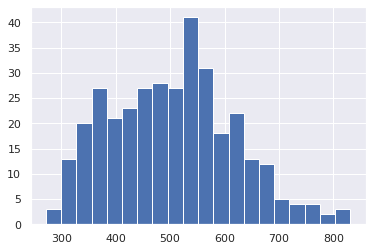

In [44]:
df.hom_doloso.hist(bins=20)
plt.show()

Podemos observar que na maioria dos meses do dataset ocorreram entre 350 e 600 homicídios dolosos , vamos checar os meses em que houveram mais de 750 homicídios para checar se há alguma ligação entre eles.

In [45]:
df[df['hom_doloso']>750]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase,Recuperacao_pct
14,1992,3,767,NaN,12,NaN,181,3732,NaN,NaN,NaN,559,250,1825,172,1069,426,27,NaN,NaN,NaN,NaN,NaN,82,4410,2241,939,NaN,NaN,NaN,3983,7163,NaN,NaN,NaN,NaN,179,NaN,NaN,NaN,951,NaN,NaN,NaN,NaN,NaN,NaN,72,NaN,NaN,NaN,779,1495,1825,NaN,3,0.233891
26,1993,3,755,NaN,18,NaN,169,3434,NaN,NaN,NaN,337,218,2289,146,735,450,13,NaN,NaN,NaN,NaN,NaN,161,4349,2458,636,NaN,NaN,NaN,3809,6903,NaN,NaN,NaN,NaN,164,NaN,NaN,NaN,869,NaN,NaN,NaN,NaN,NaN,NaN,76,NaN,NaN,NaN,773,1185,2289,NaN,3,0.183063
45,1994,10,761,NaN,8,NaN,177,3122,NaN,NaN,NaN,302,144,2361,102,897,331,44,NaN,NaN,NaN,NaN,NaN,111,4292,2068,475,NaN,NaN,NaN,2719,5262,NaN,NaN,NaN,NaN,152,NaN,NaN,NaN,1483,NaN,NaN,NaN,NaN,NaN,NaN,83,NaN,NaN,NaN,769,1228,2361,NaN,3,0.334839
47,1994,12,826,NaN,21,NaN,196,3550,NaN,NaN,NaN,293,165,2012,189,1045,406,42,NaN,NaN,NaN,NaN,NaN,159,4311,1679,571,NaN,NaN,NaN,2712,4962,NaN,NaN,NaN,NaN,143,NaN,NaN,NaN,1480,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,847,1451,2012,NaN,3,0.400975
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3,0.360191
49,1995,2,814,NaN,16,NaN,179,3286,NaN,NaN,NaN,294,144,1876,118,981,350,32,NaN,NaN,NaN,NaN,NaN,152,3947,1737,465,NaN,NaN,NaN,2519,4721,NaN,NaN,NaN,NaN,194,NaN,NaN,NaN,1293,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,830,1331,1876,NaN,3,0.357874
50,1995,3,756,NaN,17,NaN,168,3258,NaN,NaN,NaN,352,159,2271,160,976,413,26,NaN,NaN,NaN,NaN,NaN,190,4547,2135,457,NaN,NaN,NaN,2889,5481,NaN,NaN,NaN,NaN,181,NaN,NaN,NaN,1491,NaN,NaN,NaN,NaN,NaN,NaN,69,NaN,NaN,NaN,773,1389,2271,NaN,3,0.338402
51,1995,4,788,NaN,20,NaN,170,3028,NaN,NaN,NaN,315,150,2293,86,1033,426,37,NaN,NaN,NaN,NaN,NaN,176,4516,1842,440,NaN,NaN,NaN,2556,4838,NaN,NaN,NaN,NaN,230,NaN,NaN,NaN,1496,NaN,NaN,NaN,NaN,NaN,NaN,93,NaN,NaN,NaN,808,1459,2293,NaN,3,0.361790
52,1995,5,784,NaN,19,NaN,149,2864,NaN,NaN,NaN,322,158,2178,101,1021,415,26,NaN,NaN,NaN,NaN,NaN,169,4390,1843,441,NaN,NaN,NaN,2815,5099,NaN,NaN,NaN,NaN,192,NaN,NaN,NaN,1615,NaN,NaN,NaN,NaN,NaN,NaN,89,NaN,NaN,NaN,803,1436,2178,NaN,3,0.401641


Percebemos que os meses com maior número de homicídios se encontram no final de 1994 e começo de 1995, de acordo com notícias da época e atuais relembrando sobre a época temos que foi um período marcado por chacinas (como a de Nova Brasília) e violência sempre acaba por gerar mais violência, seja pela parte policial ou pela parte criminosa. O Rio passou por uma crise de violência jamais vista e o Estado demorou para conseguir controlar a situação.

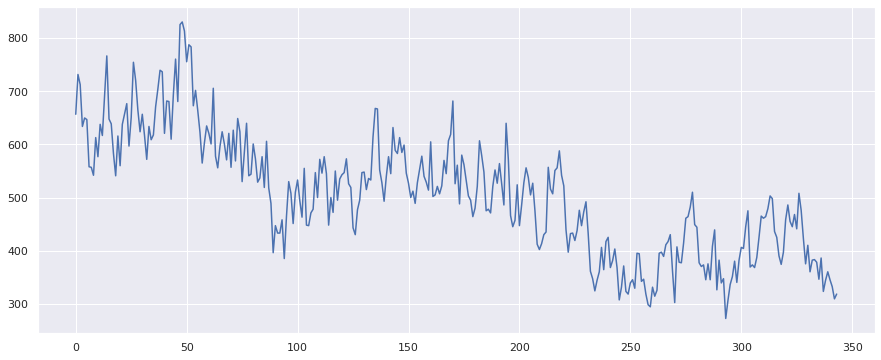

In [46]:
df.hom_doloso.plot(figsize=(15,6))
plt.show()

Lembrando que cada unidade no eixo `x` se refere a um mês, pelos primeiros 50 pontos podemos checar a a crise criminal do período de 1991 a 1995 onde o pico desse intervalo mostra o ápice evidenciado no comentário anterior.

Agora iremos recorrer aos dados referentes a ocorrências envolvendo veículos:

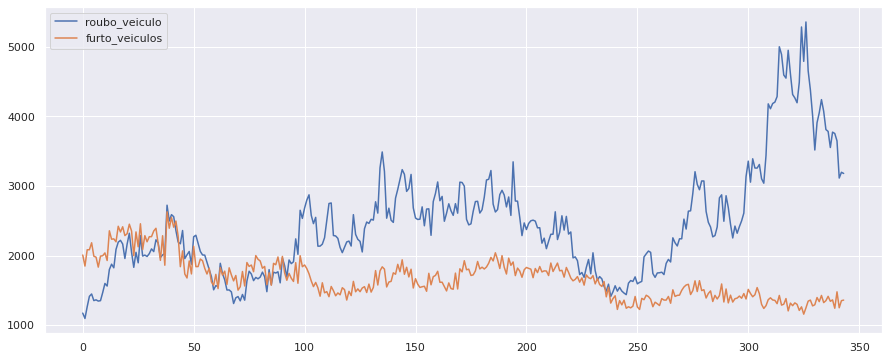

In [47]:
df.plot(y=['roubo_veiculo','furto_veiculos'],figsize=(15,6))
plt.show()

Os índices de furto de veículos tendem a diminuir com o passar do tempo, isso ocorre devido à sofistificação da tecnologia quanto a segurança de veículos, como em alarmes e mecanismos de trancamento mais complexos. Por outro lado , o roubo teve um aumento considerável nos últimos anos seguido de leves declíneos.

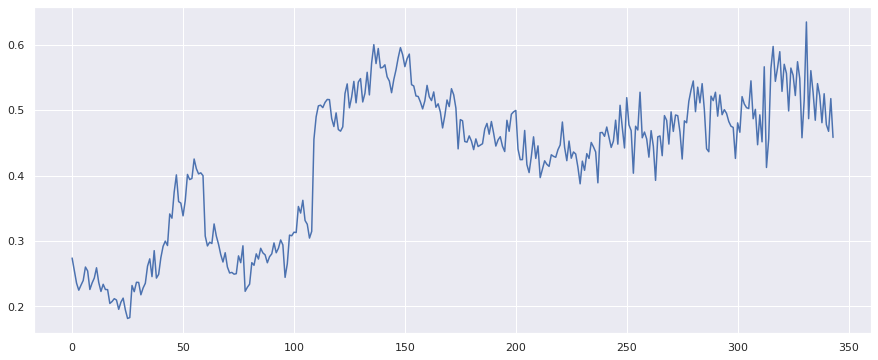

In [48]:
df.Recuperacao_pct.plot(figsize=(15,6))
plt.show()

A recuperação tem se mantido com pouca oscilação nos últimos 4 anos e se encontra sempre em torno de 52%.

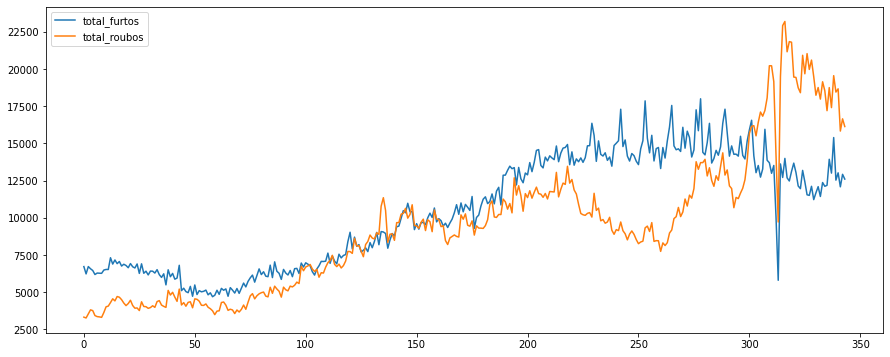

In [20]:
df.plot(y=['total_furtos','total_roubos'],figsize=(15,6))
plt.show()

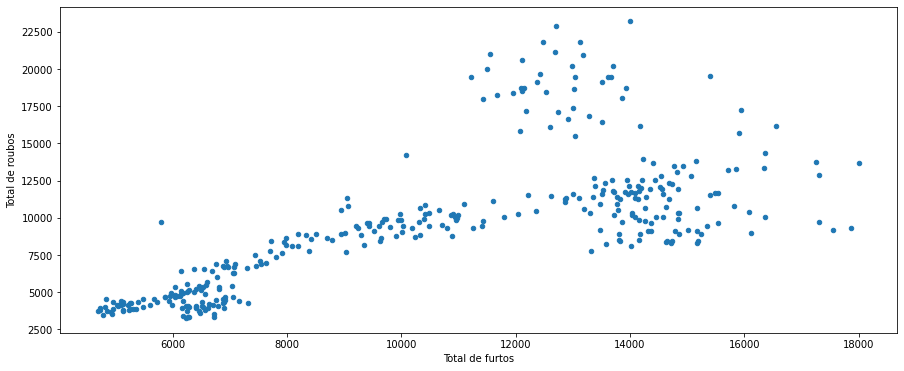

In [21]:
df.plot(x=['total_furtos'],y=['total_roubos'],figsize=(15,6),kind='scatter')
plt.ylabel('Total de roubos')
plt.xlabel('Total de furtos')
plt.show()

O número total de roubos tem uma correlação considerável com o total de furtos pois retratam épocas que o policiamento não estava sendo executado com eficiência. Calculemos o coeficiente de correlação entre estes:

In [22]:
np.corrcoef(df.total_roubos,df.total_furtos)[0][1]

0.7187487340974522

Este coeficiente confirma o que foi suposto de que o crescimento de um está consideravelmente ligado ao crescimento de outro.

##Comparação Brasil x Rio de Janeiro

Agora vamos verificar graficamente a relação da taxa de homicídios a cada 100mil habitantes para o Brasil com a taxa para o estado do Rio entre os anos de 1981 e 2015.

Primeiramente, vejamos como estão nossos datasets importados no começo deste notebook.

In [23]:
uf_homicidios.shape

(999, 4)

In [24]:
uf_homicidios.head()


,cod,nome,período,valor
0,11,RO,1981,23.67
1,53,DF,1981,13.89
2,52,GO,1981,18.78
3,51,MT,1981,6.38
4,50,MS,1981,17.98


Como a taxa tem de todas unidades federativas, vamos filtrar pelo nome para obter apenas o do RJ.

Ambos datasets são compostos pelas mesmas colunas, porém o dataset por unidade federativa apresenta 999 linhas enquanto o do país apresenta apenas 37 linhas. Isso é de se esperar dado que possuimos 27 unidades federativas, porém analisaremos apenas uma que é o RJ, assim tomaremos apenas as linhas em que a coluna nome seja igual a 'RJ'.

In [25]:
rj_homicidios = uf_homicidios[uf_homicidios['nome']=='RJ']
rj_homicidios.shape

(37, 4)

In [26]:
rj_homicidios.head()

,cod,nome,período,valor
9,33,RJ,1981,21.92
36,33,RJ,1982,18.87
63,33,RJ,1983,15.94
86,33,RJ,1984,20.85
127,33,RJ,1985,21.21


In [27]:
br_homicidios.shape

(37, 4)

In [28]:
br_homicidios.head()

,cod,nome,período,valor
0,1076,BRA,1981,12.56
1,1076,BRA,1982,12.57
2,1076,BRA,1983,13.77
3,1076,BRA,1984,15.32
4,1076,BRA,1985,15.00


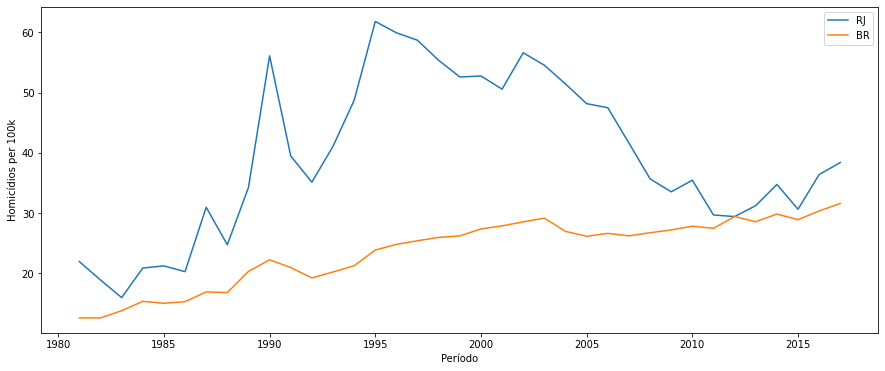

<Figure size 1080x432 with 0 Axes>

In [29]:
plt.figure(figsize=(15,6))
plt.plot(rj_homicidios['período'],rj_homicidios.valor,br_homicidios['período'],br_homicidios.valor)
plt.legend(['RJ', 'BR'])
plt.xlabel('Período')
plt.ylabel('Homicídios per 100k')
plt.figure(figsize=(15,6))
plt.show()

Pelo gráfico o problema de violência do estado torna-se evidente, no últimos 26 anos em momento algum o Rio se manteve abaixo da taxa de homicídios nacional, e vem elevando a média nacional a cada ano.

## Conclusão

Por meio de uma análise básica de variáveis do nosso banco de dados pudemos extrair informações muito úteis e que não são evidentes sem uma exploração inicial dos dados e por meio disso vêmos que o problema da violência no Rio de Janeiro tem se tornado algo endêmico quando comparado ao país como um todo.

Apesar de taxas como roubos de veículos terem aumentado nos últimos tempos também temos que as taxas de homicídio doloso tem diminuído, e pelo histórico recente sabemos que esse problema ainda está muito longe de ter uma solução que de fato diminua todos indícios de criminalidade. 